In [12]:
#install.packages("glmnet")  # Run only once


In [5]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [6]:
data(mtcars)

# Define response and predictors
x <- as.matrix(mtcars[, -1])   # predictors (excluding 'mpg')
y <- mtcars$mpg                # response variable


In [7]:
# Fit Elastic Net with alpha = 0.5 (50% Lasso + 50% Ridge)
elastic_net_model <- glmnet(x, y, alpha = 0.5)


In [8]:
set.seed(123)  # for reproducibility

cv_model <- cv.glmnet(x, y, alpha = 0.5)
best_lambda <- cv_model$lambda.min
print(best_lambda)


[1] 0.834975


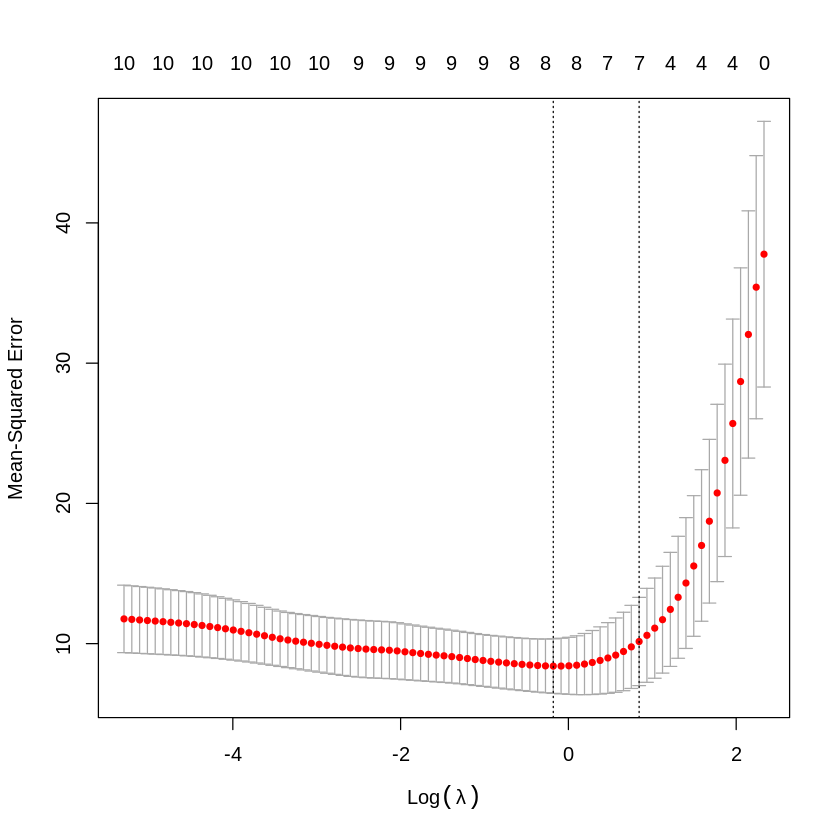

In [9]:
plot(cv_model)


In [10]:
# Coefficients at best lambda
coef(cv_model, s = "lambda.min")


11 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 31.441460703
cyl         -0.651622903
disp        -0.001531276
hp          -0.014184057
drat         0.584812825
wt          -2.083724697
qsec         .          
vs           0.276206167
am           1.131837728
gear         .          
carb        -0.307590466

In [11]:
# Predict on new data (here using training data for simplicity)
predictions <- predict(cv_model, s = "lambda.min", newx = x)
